# Simple Black-box Adversarial Attacks

Paper link: https://arxiv.org/abs/1905.07121

In [1]:
from bat.attacks import SimBA
from bat.apis.deepapi import VGG16Cifar10

In [2]:
import numpy as np
np.set_printoptions(suppress=True)

from PIL import Image

## Step 1: Load image and make predictions

In [3]:
# Load Image ranging from [0.0, 1.0]
x = np.asarray(Image.open("dog.jpg").resize((32, 32))) / 255.0

In [4]:
from matplotlib.pyplot import imshow
%matplotlib inline

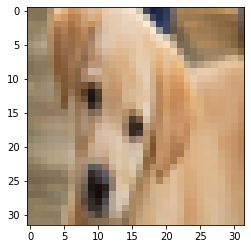

In [5]:
imshow(np.asarray(x))

In [6]:
# Initialize the DeepAPI Model
model = VGG16Cifar10("https://api.wuhanstudio.uk" + "/vgg16_cifar10")

In [7]:
# Get Preditction
y_pred = model.predict(np.array([x]))[0]

# Print result
model.print(y_pred)
print()
print('Prediction', np.argmax(y_pred), model.get_class_name(np.argmax(y_pred)))


airplane       0.00001
automobile     0.00001
bird           0.00003
cat            0.00002
deer           0.00003
dog            0.99964
frog           0.00001
horse          0.00024
ship           0.00000
truck          0.00001

Prediction 5 dog


## Step 2: Apply the SimpleBA Attack

In [8]:
simba = SimBA(model)
x_adv = simba.attack(x, epsilon=0.1, max_it=1000, distributed=True, batch=50, max_workers=10)

Distributed SimBA:  50%|██████████████████████████████████████████████████████                                                      | 10/20 [00:38<00:38,  3.86s/it, origin prob=0.284, l2 norm=1.31]


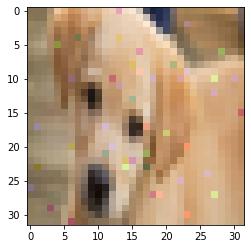

In [9]:
imshow(np.asarray(x_adv))

In [10]:
# Get predictions after attack
y_pred = model.predict(np.array([x_adv]))[0]

# Print result
model.print(y_pred)
print()
print('Prediction', np.argmax(y_pred), model.get_class_name(np.argmax(y_pred)))


airplane       0.00005
automobile     0.00003
bird           0.00036
cat            0.00115
deer           0.00060
dog            0.28446
frog           0.00003
horse          0.71330
ship           0.00001
truck          0.00002

Prediction 7 horse
